# Making sense of climate reanalysis data with xarray

Geospatial Data Analysis, Winter 2019  
March 15, 2019  
David Shean

## Introduction

This week we are going to do some basic analysis of climate reanalysis data.

We will use a few different products from the state-of-the-art ERA5 reanalysis, which currently span 1979-2019 with hourly timestep at 1/4° grid resolution (~30 km). Future releases will extent the record back to 1950.

We will use xarray to open, combine, analyze and plot the data.

## xarray

xarray offers a generic data model to work with nD arrays.  What's an nD array? (https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html)  You've been using them all quarter, but mostly 1D and 2D NumPy arrays.  

Take a moment to review this high-level introduction:
* http://xarray.pydata.org/en/stable/why-xarray.html

As with many of the packages we've covered this quarter, vocabulary can be one of the biggest blocks to learning.  Let's discuss.

![xarray image with labels](http://matthewrocklin.com/blog/images/xarray-boxes-2.png)
(http://xarray.pydata.org/en/latest/data-structures.html#dataset)

### Pandas analogies

Pandas is very good at 2D datasets (e.g., time series of met station variables [T, precip, etc]).  
* "If your data fits nicely into a pandas DataFrame then you’re better off using one of the more developed tools there." (http://xarray.pydata.org/en/v0.7.2/plotting.html)
* "pandas excels at working with tabular data. That suffices for many statistical analyses, but physical scientists rely on N-dimensional arrays – which is where xarray comes in." (http://xarray.pydata.org/en/stable/why-xarray.html#goals-and-aspirations)

xarray extends this functionality to support 3+ dimensions (e.g., time series of 2D rasters).

* xarray DataArray : Pandas DataSeries
* xarray DataSet : Pandas DataFrame

### Dataset
* Essentially, a collection of DataArrays
* http://xarray.pydata.org/en/latest/data-structures.html#dataset

### DataArray
Four essential pieces:
* values: a numpy.ndarrays with actual data values (e.g., ('t2m', 'tp')
* dims: dimension names for each axis (e.g., ('lon', 'lat', 'time'))
* coords: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
* attrs: an OrderedDict containing additional metadata (attributes)

Notes:
* One value in one of the contained arrays (say a single temperature measurement) usually has multiple coordinates ('lon', 'lat', 'time')

## Essential xarray examples and references
* Indexing and selection: http://xarray.pydata.org/en/stable/index.html
* Plotting: http://xarray.pydata.org/en/stable/plotting.html
* Time-series analysis: http://xarray.pydata.org/en/stable/time-series.html
* https://rabernat.github.io/research_computing/xarray.html

## ERA5

"ERA5 provides hourly estimates of a large number of atmospheric, land and oceanic climate variables. The data cover the Earth on a 30km grid and resolve the atmosphere using 137 levels from the surface up to a height of 80km."

"ERA5 combines vast amounts of historical observations into global estimates using advanced modelling and data assimilation systems."

* https://confluence.ecmwf.int/display/CKB/What+is+ERA5

### Variables:
Hundreds of output variables for each hourly timestep. See a list of all of the available variables:
* https://confluence.ecmwf.int/display/CKB/ERA5+data+documentation

### Resolution
The ERA5 HRES (High Resolution) data has a native resolution of 0.28125 degrees (31km)
* https://confluence.ecmwf.int/display/CKB/ERA5%3A+What+is+the+spatial+reference

### Data Availability
For this lab, I prepared some sample datasets, but for future reference, you can access these data directly!  You need to sign up for account here:
* https://registry.opendata.aws/ecmwf-era5/

Then use the CDS API to get custom ERA5 products for desired spatial extent, time periods, time intervals, etc.:
* https://cds.climate.copernicus.eu/api-how-to
* https://confluence.ecmwf.int/display/CKB/How+to+download+ERA5

# Setup

In [1]:
import os
from glob import glob

## Get the prepared dataset sample
* I downloaded some ERA5 datasets, created a zip file, staged and shared on Google Drive
* We can use the `drivanon` convenience package to easily download anonymously without authentication

In [2]:
#Clone to local notebook directory
if not os.path.exists('driveanon'):
    !git clone https://github.com/tjcrone/driveanon.git
    %cd driveanon
    !pip install .
    %cd ..

Cloning into 'driveanon'...
remote: Enumerating objects: 105, done.
remote: Total 105 (delta 0), reused 0 (delta 0), pack-reused 105
Receiving objects: 100% (105/105), 14.90 KiB | 0 bytes/s, done.
Resolving deltas: 100% (48/48), done.
Checking connectivity... done.
/home/jovyan/week10-xarray-era5-jupflug/driveanon
Processing /home/jovyan/week10-xarray-era5-jupflug/driveanon
  Running setup.py install for driveanon ... done
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
/home/jovyan/week10-xarray-era5-jupflug


In [3]:
import driveanon as da
if not os.path.exists('era5'):
    os.makedirs('era5')

In [4]:
blob_id = '1bW9FRpnLGCDPsy0khcEfcL7A07ZmgJw6'
out_fn = 'era5/era5_week10.tar'
if not os.path.exists(out_fn):
    da.save(blob_id, filename=out_fn)
    !tar -xvf era5/era5_week10.tar -C era5
    !unzip -d era5 era5/era5_climatology_1979-2018_1month.zip

era5_climatology_ppt_anomaly_1979-2018_1month.zip
era5_climatology_anomaly.py
era5_climatology_1979-2018_1month.zip
era5_climatology.py
era5_WA.py
era5_WA_ppt_1979-2018_1200.grib
era5_WA_sd_1979-2018_1200.grib
era5_WA_t_1979-2018_1200.grib
era5_WA_t_ppt_201812_hourly.grib
era5_WA_t_ppt_2018_3hr.grib
Archive:  era5/era5_climatology_1979-2018_1month.zip
 bunzipping: era5/climatology_rgg_ei_TP_02_19812010_v01.grib  
 bunzipping: era5/climatology_rgg_ei_TP_10_19812010_v01.grib  
 bunzipping: era5/climatology_0.25g_ei_2T_03_19812010_v01.grib  
 bunzipping: era5/climatology_rgg_ei_TP_04_19812010_v01.grib  
 bunzipping: era5/climatology_rgg_ei_TP_06_19812010_v01.grib  
 bunzipping: era5/climatology_rgg_ei_TP_08_19812010_v01.grib  
 bunzipping: era5/climatology_0.25g_ei_2T_12_19812010_v01.grib  
 bunzipping: era5/climatology_rgg_ei_TP_07_19812010_v01.grib  
 bunzipping: era5/climatology_rgg_ei_TP_09_19812010_v01.grib  
 bunzipping: era5/climatology_0.25g_ei_2T_11_19812010_v01.grib  
 bunzippin

Note: The following will take a few minutes, take the time to review the remainder of the lab

In [5]:
blob_id = '1gomQR_lvhuww_xyR6wcUiziS12x1yCSx'
out_fn = 'era5/era5_climatology_t_anomaly_1979-2018_1month.zip'
if not os.path.exists(out_fn):
    da.save(blob_id, filename=out_fn)
    !unzip -d era5 era5/era5_climatology_t_anomaly_1979-2018_1month.zip

Archive:  era5/era5_climatology_t_anomaly_1979-2018_1month.zip
 bunzipping: era5/1month_anomaly_Global_ei_2T_200507_v01.grib  
 bunzipping: era5/1month_anomaly_Global_ei_2T_198511_v01.grib  
 bunzipping: era5/1month_anomaly_Global_ei_2T_201205_v01.grib  
 bunzipping: era5/1month_anomaly_Global_ei_2T_198009_v01.grib  
 bunzipping: era5/1month_anomaly_Global_ei_2T_201506_v01.grib  
 bunzipping: era5/1month_anomaly_Global_ei_2T_200701_v01.grib  
 bunzipping: era5/1month_anomaly_Global_ei_2T_199311_v01.grib  
 bunzipping: era5/1month_anomaly_Global_ei_2T_198304_v01.grib  
 bunzipping: era5/1month_anomaly_Global_ei_2T_199906_v01.grib  
 bunzipping: era5/1month_anomaly_Global_ei_2T_199409_v01.grib  
 bunzipping: era5/1month_anomaly_Global_ei_2T_198207_v01.grib  
 bunzipping: era5/1month_anomaly_Global_ei_2T_201704_v01.grib  
 bunzipping: era5/1month_anomaly_Global_ei_2T_201409_v01.grib  
 bunzipping: era5/1month_anomaly_Global_ei_2T_201803_v01.grib  
 bunzipping: era5/1month_anomaly_Global_e

## Install necessary packages to open GRIB files (default ERA5 format) with xarray

While you wait, open a terminal and inspect the contents of the era5 directory, and review this information
* http://xarray.pydata.org/en/stable/io.html#grib-format-via-cfgrib

In [6]:
#Install the cfgrid package, needed to read grib files with xarray
!conda install -y -c conda-forge eccodes
!conda install -y -c conda-forge cfgrib

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda:

The following NEW packages will be INSTALLED:

    eccodes: 2.12.0-h7f9dc84_1   conda-forge
    libaec:  1.0.4-hf484d3e_0    conda-forge

The following packages will be SUPERSEDED by a higher-priority channel:

    jasper:  1.900.31-h07fcdf6_0 conda-forge --> 1.900.1-h07fcdf6_1006 conda-forge

libaec-1.0.4-h 100% |################################| Time: 0:00:00  13.18 MB/s
jasper-1.900.1 100% |################################| Time: 0:00:00  15.96 MB/s
eccodes-2.12.0 100% |################################| Time: 0:00:00  58.48 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda:

The following NEW packages will be INSTALLED:

    cfgrib:     0.9.6-py_0       conda-forge
    future:     0.17.1-py36_1000 conda-forge
    typing:     3.6.4-py36_0     conda-forge

The following

## OK, let's get started with the data analysis already!

In [7]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline
#%matplotlib widget

# Part 1: Global climatology and monthly temperature anomalies from 1979-2018
* Two files are provided:
    1. Climatology - long-term mean monthly values over the full 40-year period (12 grids)
    2. Anomaly - monthly difference from long-term monthly mean (480 grids)
* https://cds.climate.copernicus.eu/cdsapp#!/dataset/ecv-for-climate-change?tab=overview
* http://datastore.copernicus-climate.eu/c3s/published-forms/c3sprod/ecv-for-climate-change/PUG-ecv-for-climate-change.pdf
* See here for explanation of how they are calculated: http://xarray.pydata.org/en/stable/examples/weather-data.html#calculate-monthly-anomalies

Note that precip anomalies are on Gaussian grid (rgg), so we'll skip for now: https://confluence.ecmwf.int/display/FCST/Gaussian+grids

In [9]:
datadir = 'era5'

In [10]:
cd $datadir

/home/jovyan/week10-xarray-era5-jupflug/era5


## Function to load and combine grib files into a single xarray DataSet
* Also creates a new, compressed netcdf (nc) file to store the data for future use
* See relevant doc on opening and writing files: http://xarray.pydata.org/en/stable/io.html

In [11]:
def grib2netcdf(out_fn, writeout=True):
    if not os.path.exists(out_fn):
        #Get all grib filenames in the directory
        paths = sorted(glob(os.path.splitext(out_fn)[0]+'*.grib'))
        #Generate xarray dataset list, opening with cfgrib engine
        datasets = [xr.open_dataset(p, engine='cfgrib') for p in paths]
        #Concatenate all datasets along the time axis
        combined = xr.concat(datasets, dim='time')
        #Drop unnecessary coordinates
        combined = combined.drop(['number', 'surface', 'step', 'valid_time'])
        if writeout:
            #Set up encoding parameters to use compression when writing netcdf file
            comp = dict(zlib=True, complevel=5)
            encoding = {var: comp for var in combined.data_vars}
            #Write out
            combined.to_netcdf(out_fn, encoding=encoding)
    else:
        combined = xr.open_dataset(out_fn)
    return combined

## Process and open global monthly temperature anomaly and climatology
* Note that processing and saving the anomalies could take some time, as you're reading in 480 files and saving a large nc file
* Take a moment to review the steps in the above function and the io doc for xarray
    * Note the `open_dataset` and `concat` functions

In [65]:
out_fn = 'climatology_0.25g_ei_2T.nc'
t_clim_ds = grib2netcdf(out_fn)

In [66]:
out_fn = '1month_anomaly_Global_ei_2T.nc'
t_anom_ds = grib2netcdf(out_fn)

## Inspect the DataSets
* Discuss with your neighbor
* Review the output of the `info()` method
* Note the number of time slices in each DataSet
* Note: The year listed in the climatology dataset is arbitrary at 2016, as these are monthly means for the 1981-2010 period
* print info for the 't2m' DataArray (temperature 2 m above ground)

In [67]:
#t_anom_ds.info()
t_anom_ds['t2m']

<xarray.DataArray 't2m' (time: 480, latitude: 721, longitude: 1440)>
[498355200 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Attributes:
    GRIB_paramId:                             167
    GRIB_shortName:                           2t
    GRIB_units:                               K
    GRIB_name:                                2 metre temperature
    GRIB_cfVarName:                           t2m
    GRIB_dataType:                            an
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      1038240
    GRIB_totalNumber:                         0
    GRIB_typeOfLevel:                         surface
    GRIB_NV:                                  0
    GRIB_stepUnits:                           1
    GRIB_stepType: 

## How many total grid cells are there in each time slice of the anomaly DataSet?

## Convert the temperature values from K to C for the climatology dataset
* Note: don't need to do this for anomalies, as they are relative values, not absolute
* These operations are done on the DataArray level, so you'll need to modify ds['t2m']
* Make sure you also update the 't2m' DataArray units attribute string
* Sanity check values

In [68]:
t_clim_ds['t2mC'] = t_clim_ds['t2m'] - 273.16

In [71]:
t_clim_ds['t2m'].attrs
t_clim_ds['t2mC'].attrs['GRIB_units'] = 'C'

In [72]:
t_clim_ds['t2mC'].attrs

OrderedDict([('GRIB_units', 'C')])

## Create a Facet plot showing temperature values for each Month in the climatology DataSet
* http://xarray.pydata.org/en/stable/plotting.html#faceting

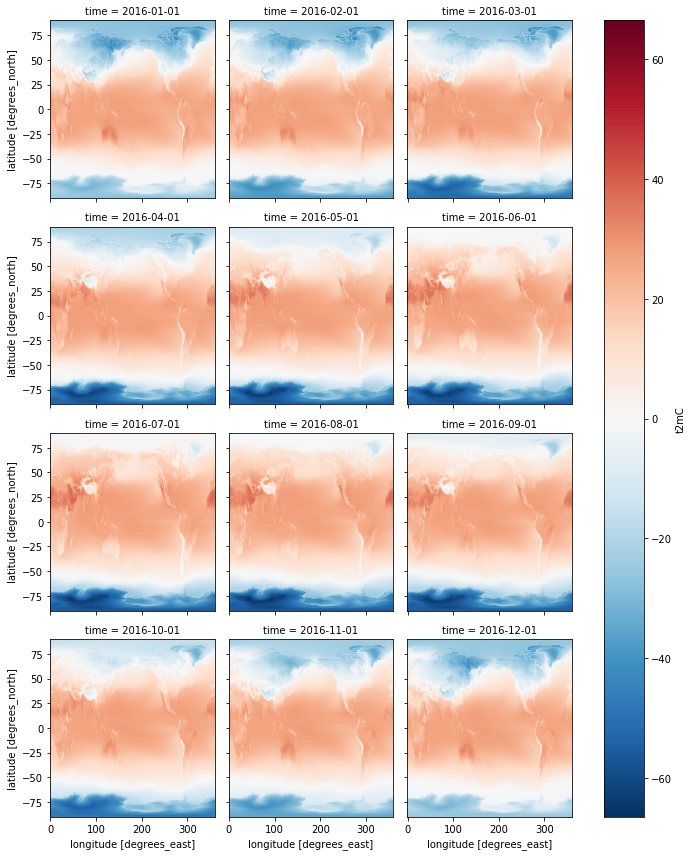

In [74]:
simple = t_clim_ds['t2mC'].plot(x='longitude',y='latitude',col='time',\
                        col_wrap=3)

## Create a plot for August, overlaying coastlines with cartopy
Use a simple PlateCaree() projection as in example here:
* https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html

Once you have your axes setup, you should be able to plot with xarray easily (pass the axes object to `plot()` function:
* http://xarray.pydata.org/en/stable/plotting.html#maps

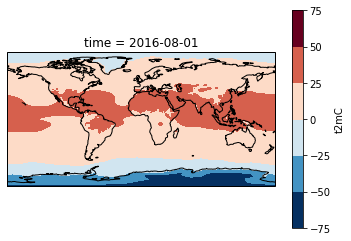

In [80]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
t_clim_ds['t2mC'][7].plot.contourf(ax=ax,transform=ccrs.PlateCarree())

## Create line plot of mean monthly temperatures for the planet
* Compute the mean of the climatology t2m DataArray in the spatial dimensions (can use `dim=('latitude', 'longitude')` for this)

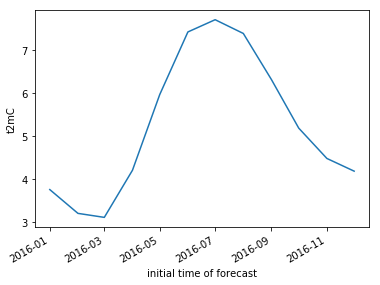

In [85]:
t_clim_ds['t2mC'].mean(dim=('latitude', 'longitude')).plot()

## Create line plot showing mean monthly temperature for the Arctic and Antarctic
* See location indexing here: http://xarray.pydata.org/en/stable/indexing.html#assigning-values-with-indexing
* Here's how I did this:
    * Define boolean index arrays for t_clim_ds['latitude'] coordinate for relevant latitude ranges (Use Arctic and Antarctic circle as threshold)
    * Use the index array with xarray `sel` method on the t_clim_ds['t2m'] DataArray
    * Compute the mean across all returned lat/lon grid cells as you did for the entire planet earlier
* Note the magnitude and phase of the seasonal temperature varability

In [112]:
t_clim_ds['arctic'] = xr.full_like(t_clim_ds['t2mC'],fill_value = None)
t_clim_ds['antarc'] = xr.full_like(t_clim_ds['t2mC'],fill_value = None)

In [122]:
la = t_clim_ds.coords['latitude']

In [123]:
mask = t_clim_ds.coords['latitude'] > 66.5
mask2 = t_clim_ds.coords['latitude'] < -66.5

In [124]:
t_clim_ds['arctic'] = xr.where(mask,t_clim_ds['t2mC'],\
                              t_clim_ds['arctic'])
t_clim_ds['antarc'] = xr.where(mask2,t_clim_ds['t2mC'],\
                              t_clim_ds['antarc'])

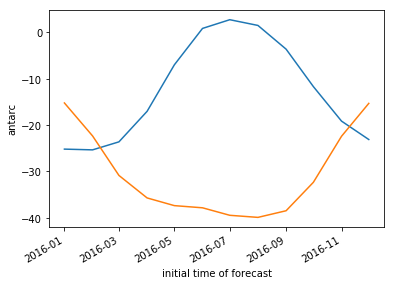

In [126]:
t_clim_ds['arctic'].mean(dim=('latitude', 'longitude')).plot()
t_clim_ds['antarc'].mean(dim=('latitude', 'longitude')).plot()

# Someone once said that climate change was a hoax.  Let's check.

## Create a line plot of mean global temperature anomaly over the full 1979-2018 period
* This should be very simple

In [ ]:
t_anom_ds['t2m'].mean(dim=('latitude', 'longitude')).plot()

## Did the Arctic and Antarctic warm at the same rate over the past 40 years?
* Create a quick line plot for anomaly values using the earlier indices

## Extra credit: Group temperature anomalies by decade - which was the warmest?

## Extra credit: compute linear temperature trend at each pixel and plot

# Part 2: Hourly data for WA state

## Get the WA state outline

In [31]:
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
#states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json'
states_gdf = gpd.read_file(states_url)

In [32]:
wa_state = states_gdf.loc[states_gdf['NAME'] == 'Washington']
#wa_state.plot(facecolor='none', edgecolor='black')

## Helper function for plotting WA grids with state outline overlay

In [33]:
def plotwa(ds_in, v_list=['t2m','tp','sd']):
    f,axa = plt.subplots(1,3, figsize=(10,2), sharex=True, sharey=True)
    for i,v in enumerate(v_list):
        ds_in[v].plot(ax=axa[i], robust=True)
        wa_state.plot(ax=axa[i], facecolor='none', edgecolor='black')
    f.tight_layout()

## Load the WA temperature, precipitation and snow depth products
* Note: these are extracted for 12:00 UTC
* Really want daily averages for much of this, but I didn't have time to go back and requery ERA5
* Let's use what we have to play around

In [39]:
wa_fn = ['era5_WA_t_1979-2018_1200.grib', 'era5_WA_ppt_1979-2018_1200.grib', 'era5_WA_sd_1979-2018_1200.grib']

In [35]:
wa_t = xr.open_dataset(wa_fn[0], engine='cfgrib')
wa_t = wa_t.drop(['number', 'surface', 'step', 'valid_time'])
wa_t -= 273.15
wa_t['t2m'].attrs['units'] = 'C'

In [36]:
wa_tp = xr.open_dataset(wa_fn[1], engine='cfgrib')
wa_tp = wa_tp.drop(['number', 'surface', 'step', 'valid_time'])
#Hack: the cdsapi is returning values at 06:00 instead of 12:00 for precip
wa_tp['time'] = wa_tp['time'] + np.timedelta64(6, 'h')
#Convert meters to mm
wa_tp *= 1000
wa_tp['tp'].attrs['units'] = 'mm'

In [41]:
wa_sd = xr.open_dataset(wa_fn[2], engine='cfgrib')
wa_sd = wa_sd.drop(['number', 'surface', 'step', 'valid_time'])

## Merge the WA datasets
* http://xarray.pydata.org/en/stable/combining.html
* Inspect the output - note how multiple DataArrays are stored

In [42]:
wa_merge = xr.merge([wa_t, wa_tp, wa_sd])

## Compute seasonal mean values for each variable
* This is a simple `groupby()` and `mean()`
* Inspect the output values - do these make sense?

## Create some plots of mean, max, and std for the full 1979-1980 time period
* Pass the relevant dataset (e.g. `wa_merge.mean('time')`) to the `plotwa` helper function

## Create a plot showing the conditions the day before and after the Mt. St. Helen's eruption

## Extract the time series for Seattle and Mt. Rainier temperature and create line plots
* You'll need to look up coordinates
    * Check the longitude values in the DataArrays (-180 to 180, or 0 to 360)
* Can use the `sel()` method to extract time series for the grid cell nearest the specified 'longitude' and 'latitude' coordinates
    * http://xarray.pydata.org/en/stable/indexing.html
* Sanity check

## Helper function to plot time series

In [67]:
def plotv(ds_in, v_list=['t2m','tp','sd']):
    f,axa = plt.subplots(3,1, figsize=(10,8), sharex=True)
    for i,v in enumerate(v_list):
        ds_in[v].plot(ax=axa[i], lw=0.5)
        axa[i].axhline(0,color='k',lw=0.5)
    f.tight_layout()

## Compute stats for monthly, annual time periods
* Can use `groupby('time.year').max(dim='time')`
* Plot snow depth for April and September

# Extra credit

## Export mean grid to rasterio
* https://github.com/robintw/XArrayAndRasterio/blob/master/rasterio_to_xarray.py

## Load SRTM DEM for WA
* Resample

## Plot contours from SRTM DEM over temperature grid

## Compute atmospheric temperature lapse rate using SRTM elevations